Chargez les données disponibles à l'adresse suivante: url = https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip. Ce sont les données utilisées lors du checkpoint.

In [0]:
import pandas as pd
import numpy as np

df_music=pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip')

In [0]:
df_music.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [0]:
df_music.describe(include='all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232725,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148615,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,3uSSjnDMmoyERaAK9KvpJR,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


In [0]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Vérifiez la présence de valeurs nulles ou manquantes et afficher les types des différentes variables.

In [0]:
df_music.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Réalisez un analyse en composantes principales. Pour cela: 
- sélectionnez les variables numériques pertinentes
- centrez et réduisez les données 
- appliquez l'ACP
- faites le graphique de la variance expliquée
- déterminez le nombre de composantes à garder 
- affichez la nouvelle table avec uniquement les composantes principales sélectionnées

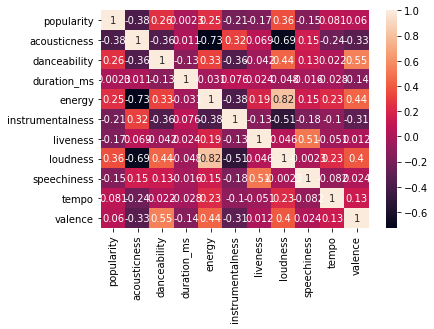

In [0]:
import seaborn as sns

sns.heatmap(df_music.corr(), annot=True)

In [0]:
columnsNames = df_music.select_dtypes(exclude='object').columns.values
columnsNames

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'], dtype=object)

In [0]:
from sklearn.preprocessing import StandardScaler
X=df_music[columnsNames].to_numpy()


In [0]:
X

array([[0.00000e+00, 6.11000e-01, 3.89000e-01, ..., 5.25000e-02,
        1.66969e+02, 8.14000e-01],
       [1.00000e+00, 2.46000e-01, 5.90000e-01, ..., 8.68000e-02,
        1.74003e+02, 8.16000e-01],
       [3.00000e+00, 9.52000e-01, 6.63000e-01, ..., 3.62000e-02,
        9.94880e+01, 3.68000e-01],
       ...,
       [4.70000e+01, 9.01000e-01, 5.17000e-01, ..., 1.48000e-01,
        8.41350e+01, 8.13000e-01],
       [4.40000e+01, 2.62000e-01, 7.45000e-01, ..., 1.46000e-01,
        1.00031e+02, 4.89000e-01],
       [3.50000e+01, 9.73000e-02, 7.58000e-01, ..., 2.87000e-02,
        1.13897e+02, 4.79000e-01]])

In [0]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-2.26100656,  0.6833763 , -0.89093479, ..., -0.36796995,
         1.5956073 ,  1.38074423],
       [-2.20603102, -0.34546718,  0.19199369, ..., -0.18308213,
         1.82325339,  1.38843461],
       [-2.09607995,  1.6445698 ,  0.58529607, ..., -0.45583209,
        -0.5883258 , -0.33421214],
       ...,
       [ 0.32284371,  1.50081358, -0.20130869, ...,  0.14680516,
        -1.08520529,  1.37689903],
       [ 0.1579171 , -0.30036719,  1.02708778, ...,  0.13602453,
        -0.57075233,  0.13105629],
       [-0.33686274, -0.7646152 ,  1.09712793, ..., -0.49625945,
        -0.12199762,  0.09260435]])

## ACP

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA()

In [0]:
pca.fit_transform(X_scaled)

array([[-0.99045021,  0.99939247, -0.15971079, ..., -0.57606002,
        -1.16234344,  0.04739106],
       [-1.20961308,  0.27304197, -0.6842291 , ...,  0.05743423,
        -0.09104391, -0.13059361],
       [ 2.1124023 ,  0.35316191, -1.86682122, ...,  0.8724981 ,
        -0.59542754, -0.0997507 ],
       ...,
       [ 0.32506902,  0.19737258, -1.67204781, ..., -1.47518739,
        -0.71435391, -0.34179443],
       [-1.06009706,  0.64113552, -0.34201002, ...,  0.57789031,
        -0.12977614,  0.2320321 ],
       [-0.74982873, -0.6666449 , -0.23754489, ...,  0.85888183,
         0.1452915 , -0.38296445]])

In [0]:
pca.n_components_

11

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3282235 , 0.15545747, 0.10647707, 0.09089407, 0.07833839,
       0.06879605, 0.05798688, 0.04412532, 0.03410832, 0.02515864,
       0.01043429])

In [0]:
np.cumsum(explained_variance)

array([0.3282235 , 0.48368097, 0.59015804, 0.68105211, 0.75939051,
       0.82818656, 0.88617344, 0.93029875, 0.96440707, 0.98956571,
       1.        ])

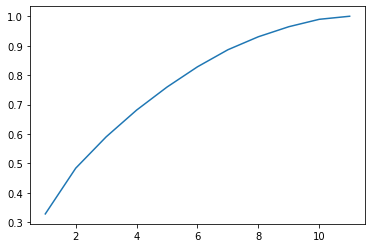

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))

In [0]:
pca2 = PCA(n_components = 6)
Xpca = pca2.fit_transform(X_scaled)
pd.DataFrame(Xpca)

,0,1,2,3,4,5
0,-0.990450,0.999392,-0.159711,-3.096298,0.713255,-0.743454
1,-1.209613,0.273042,-0.684229,-2.729830,1.282702,-0.121344
2,2.112402,0.353162,-1.866821,-0.266675,0.709725,0.399527
3,1.954505,-0.186844,0.251315,-2.661387,-0.022116,0.606917
4,2.935588,0.391576,-1.123134,-2.093773,-0.025188,0.415516
...,...,...,...,...,...,...
232720,-0.923589,-0.893221,-0.467573,0.010477,1.997912,-0.905657
232721,-1.909356,-0.022248,-0.836774,0.211650,1.506918,-0.237733
232722,0.325069,0.197373,-1.672048,0.644906,0.064459,0.209526
232723,-1.060097,0.641136,-0.342010,0.663994,-0.065338,-0.214804


Réalisez une projection des données dans le premier plan  factoriel (PC1 et PC2 en *x* et *y*) et colorez les morceaux par genre.

In [0]:
df = pd.concat([df_music,pd.DataFrame(Xpca)],axis=1)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,0,1,2,3,4,5
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,-0.990450,0.999392,-0.159711,-3.096298,0.713255,-0.743454
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,-1.209613,0.273042,-0.684229,-2.729830,1.282702,-0.121344
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.112402,0.353162,-1.866821,-0.266675,0.709725,0.399527
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1.954505,-0.186844,0.251315,-2.661387,-0.022116,0.606917
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,2.935588,0.391576,-1.123134,-2.093773,-0.025188,0.415516


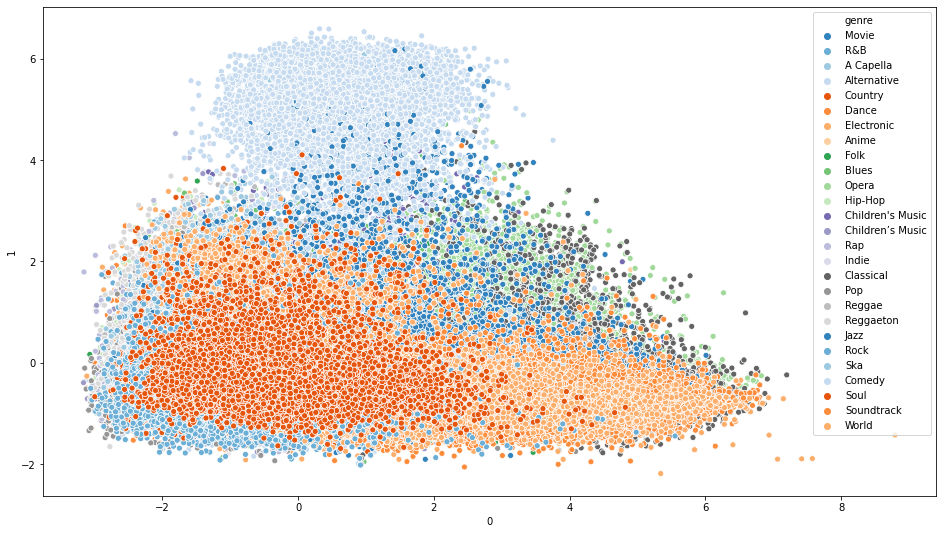

In [51]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=0,y=1, hue='genre', data=df, palette='tab20c')

Si vous avez terminé, réalisez le cercle des corrélations dans le premier plan factoriel.

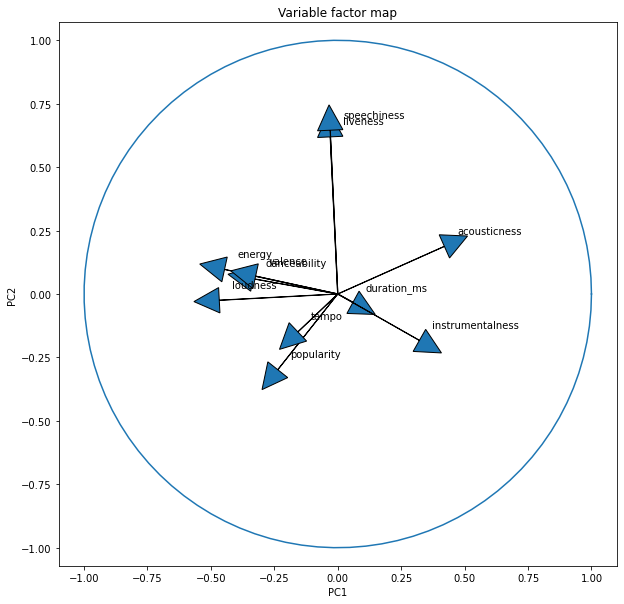

In [0]:
(fig, ax) = plt.subplots(figsize=(10, 10))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
            pca.components_[1, i] + 0.05,
            columnsNames[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()